# Project - EDA with Pandas Using the Ames Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains housing values in the suburbs of Ames.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file ``ames_train.csv``) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data.
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions
Look in ``data_description.txt`` for a full description of all variables.

A preview of some of the columns:

**MSZoning**: Identifies the general zoning classification of the sale.
		
       A	 Agriculture
       C	 Commercial
       FV	Floating Village Residential
       I	 Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

**OverallCond**: Rates the overall condition of the house

       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor

**KitchenQual**: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

**YrSold**: Year Sold (YYYY)

**SalePrice**: Sale price of the house in dollars

In [18]:
# Let's get started importing the necessary libraries
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt


In [19]:
# Loading the data
df = pd.read_csv('ames_train.csv', index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [20]:
# Investigate the Data
df.info()
#df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<IPython.core.display.Javascript object>


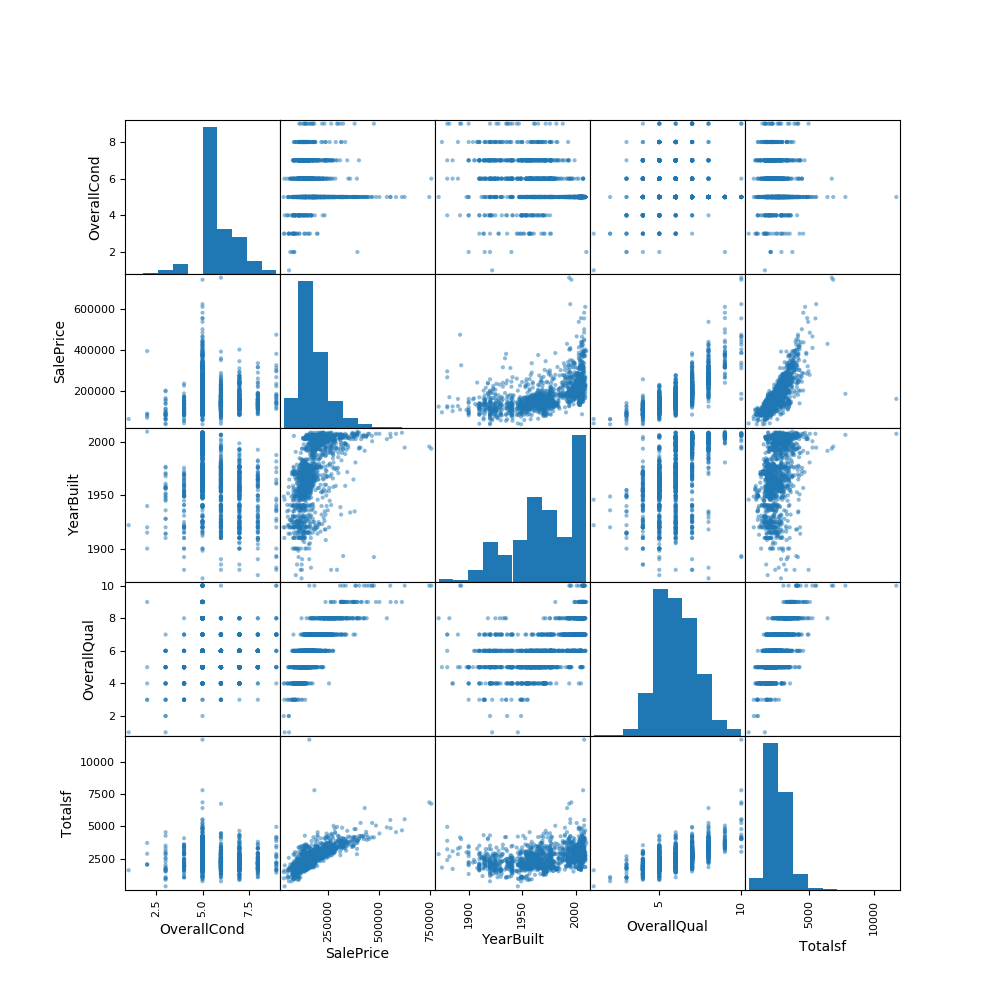

In [113]:
# Investigating Distributions using scatter_matrix

df['Totalsf'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

pd.plotting.scatter_matrix(df[['OverallCond', 'SalePrice', 'YearBuilt', 'OverallQual', 'Totalsf']], figsize=(10,10));

<IPython.core.display.Javascript object>


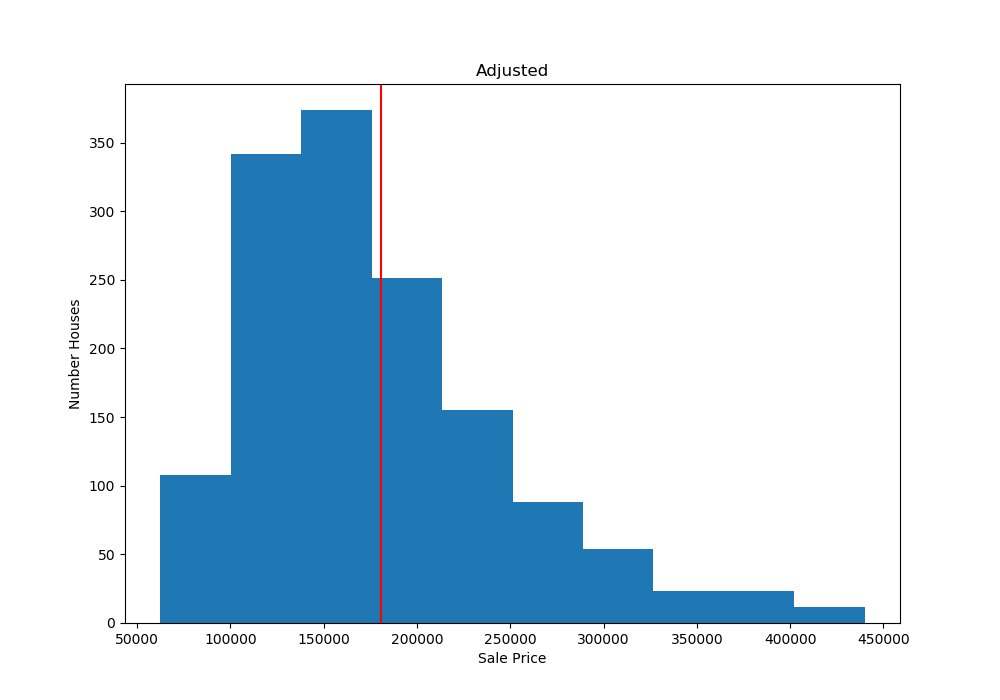

Text(0.5, 1.0, 'Adjusted')

In [95]:
# Create a plot that shows the SalesPrice Distribution
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title('Distribution of Sale Prices')
ax.set_xlabel('Sale Price')
ax.set_ylabel('Number Houses')
ax.axvline(df['SalePrice'].mean(), color='red');

# original histogram plotting all sales prices
#ax.hist(df['SalePrice'], bins='auto')

# adjusting the data to 1st-99th percentile and ignoring outliers
pd_series = pd.Series(df['SalePrice']) 
pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.01), pd_series.quantile(.99))] 
ax.hist(pd_series_adjusted)
ax.set_title('Adjusted')

<IPython.core.display.Javascript object>


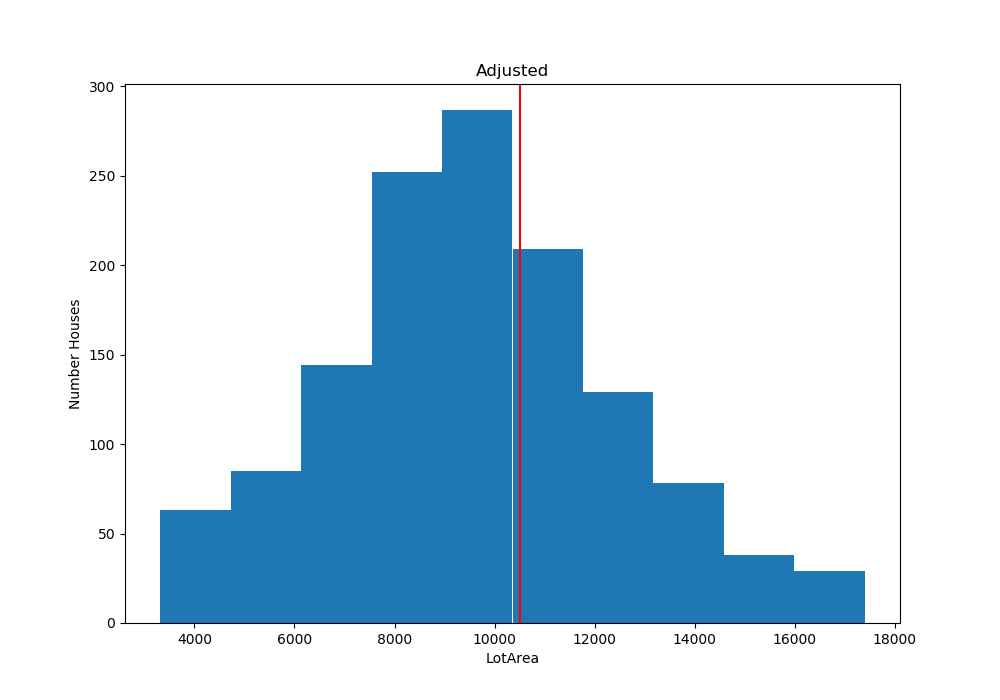

In [93]:
# Create a plot that shows the LotArea Distribution
fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title('Distribution of Lot Area')
ax.set_xlabel('LotArea')
ax.set_ylabel('Number Houses')
ax.axvline(df['LotArea'].mean(), color='red')

# plotting all of the Lot Areas, including the outliers
#ax.hist(df['LotArea'], bins='auto')

# adjusting the data to 5th-95th percentile and ignoring outliers
pd_series = pd.Series(df['LotArea']) 
pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))] 
ax.hist(pd_series_adjusted)
ax.set_title('Adjusted');

<IPython.core.display.Javascript object>


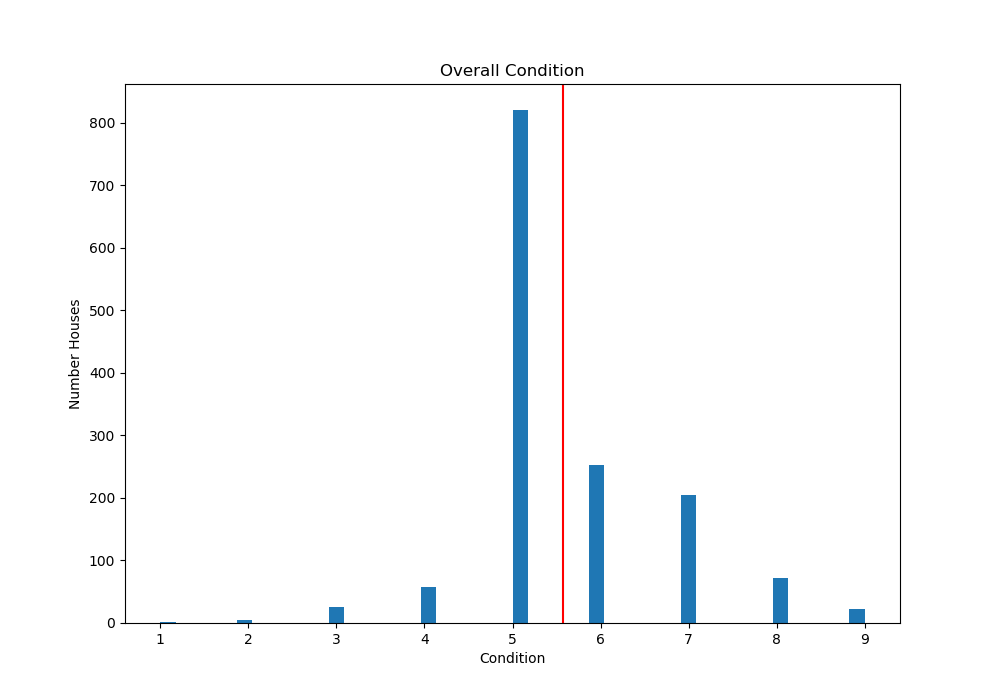

In [109]:
# Create a plot that shows the Distribution of the overall house condition
fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title('Overall Condition')
ax.set_xlabel('Condition')
ax.set_ylabel('Number Houses')
ax.axvline(df['OverallCond'].mean(), color='red')

# plotting all of the Lot Areas, including the outliers
ax.hist(df['OverallCond'], bins='auto');

# adjusting the data to 5th-95th percentile and ignoring outliers
#pd_series = pd.Series(df['OverallCond']) 
#pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))] 
#ax.hist(pd_series_adjusted)
#ax.set_title('Adjusted');

<IPython.core.display.Javascript object>


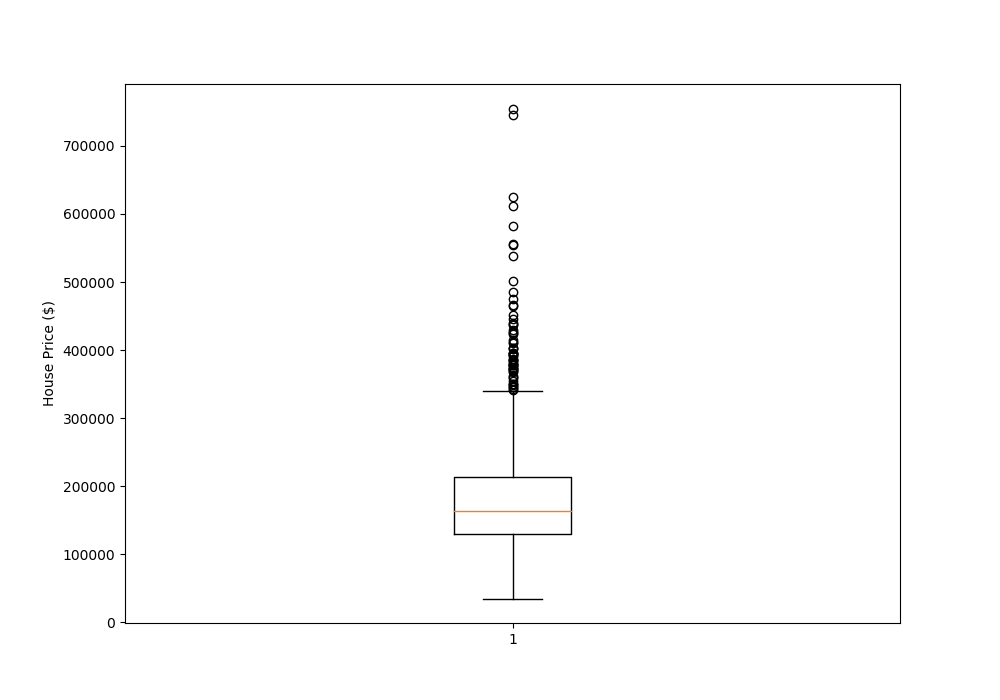

age             -0.523350
decades         -0.512895
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
Totalsf          0.782260
OverallQual 

In [114]:
# Create a Box Plot for SalePrice
#df['SalePrice'].plot.box()

fig, ax = plt.subplots(figsize=(10, 7))
ax.boxplot(df['SalePrice'])
ax.set_ylabel('House Price ($)');

df.corr()['SalePrice'].sort_values()

<IPython.core.display.Javascript object>


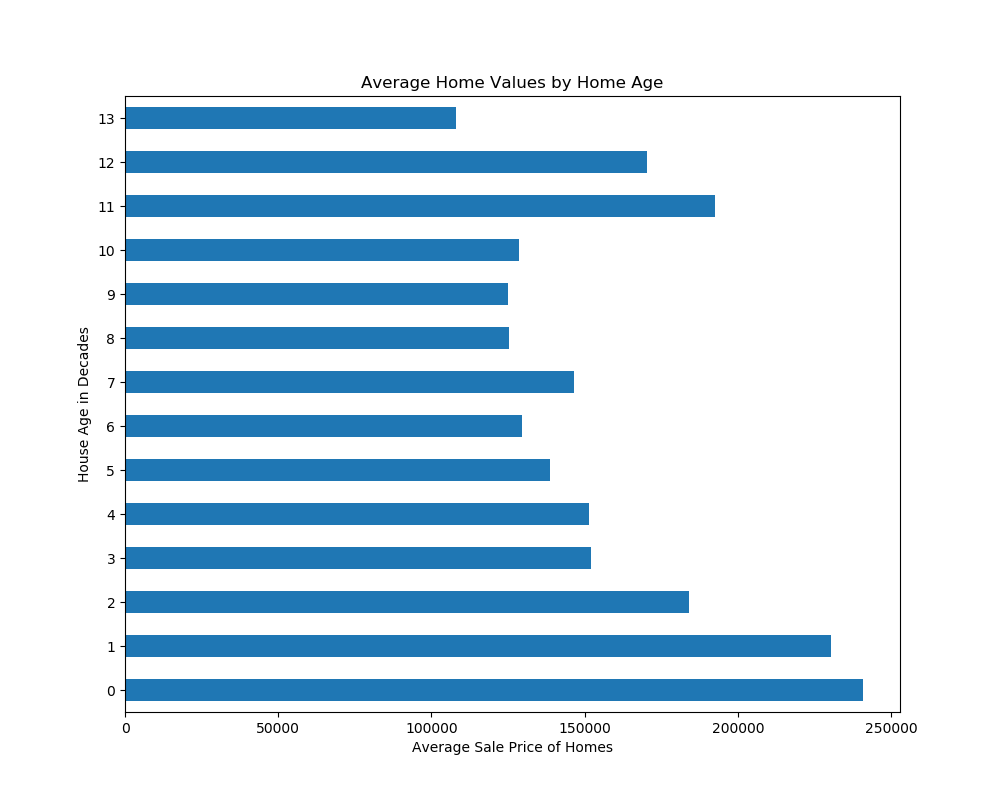

In [110]:
# Perform an Exploration of home values by age
df['age'] = df['YrSold'] - df['YearBuilt']
df['decades'] = df.age // 10
to_plot = df.groupby('decades').SalePrice.mean()
to_plot.plot(kind='barh', figsize=(10,8))
plt.ylabel('House Age in Decades')
plt.xlabel('Average Sale Price of Homes')
plt.title('Average Home Values by Home Age');

#df.plot.scatter('YearBuilt', 'SalePrice', 
#                c = 'OverallQual',
#                  s = df['OverallQual'],
#                  colormap = 'viridis');

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!